In [11]:
import pandas as pd
%matplotlib inline

# Resampling

-Changing the frequency of your time series observations.

- There is two types:

  - Upsampling: Increase frequency. Example: from minutes to seconds.
  - Downsampling: decrease frequency. Example: from days to months.

## Upsampling

In [12]:
from pandas import read_csv
from pandas import datetime

<ipython-input-12-0063e5fc7b57>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [13]:
def parser(x):
    return datetime.strptime('190'+ x, '%Y-%m')

In [22]:
s1 = read_csv('../data/shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [23]:
s1.head()


Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
Name: Sales, dtype: float64

upsampled1 = s1.resample('D').mean()

There will be a mistake because I need to use the function parser. 
It is very important the month have a correct date, then we can calculate
meand over the days.

In [33]:
s2 = pd.read_csv('../data/shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True,date_parser=parser)

In [34]:
s2.head()


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

The Shampoo Sales are monthly. Goal: daily sales information

In [50]:
upsampled2 = s2.resample('D').mean()

In [51]:
upsampled2.head(32)

Month
1901-01-01    266.0
1901-01-02      NaN
1901-01-03      NaN
1901-01-04      NaN
1901-01-05      NaN
1901-01-06      NaN
1901-01-07      NaN
1901-01-08      NaN
1901-01-09      NaN
1901-01-10      NaN
1901-01-11      NaN
1901-01-12      NaN
1901-01-13      NaN
1901-01-14      NaN
1901-01-15      NaN
1901-01-16      NaN
1901-01-17      NaN
1901-01-18      NaN
1901-01-19      NaN
1901-01-20      NaN
1901-01-21      NaN
1901-01-22      NaN
1901-01-23      NaN
1901-01-24      NaN
1901-01-25      NaN
1901-01-26      NaN
1901-01-27      NaN
1901-01-28      NaN
1901-01-29      NaN
1901-01-30      NaN
1901-01-31      NaN
1901-02-01    145.9
Freq: D, Name: Sales, dtype: float64

###      Using interpolation:

#### Linear interpolation

In [53]:
interpolated=upsampled2.interpolate(method='linear')
interpolated.head(32)

Month
1901-01-01    266.000000
1901-01-02    262.125806
1901-01-03    258.251613
1901-01-04    254.377419
1901-01-05    250.503226
1901-01-06    246.629032
1901-01-07    242.754839
1901-01-08    238.880645
1901-01-09    235.006452
1901-01-10    231.132258
1901-01-11    227.258065
1901-01-12    223.383871
1901-01-13    219.509677
1901-01-14    215.635484
1901-01-15    211.761290
1901-01-16    207.887097
1901-01-17    204.012903
1901-01-18    200.138710
1901-01-19    196.264516
1901-01-20    192.390323
1901-01-21    188.516129
1901-01-22    184.641935
1901-01-23    180.767742
1901-01-24    176.893548
1901-01-25    173.019355
1901-01-26    169.145161
1901-01-27    165.270968
1901-01-28    161.396774
1901-01-29    157.522581
1901-01-30    153.648387
1901-01-31    149.774194
1901-02-01    145.900000
Freq: D, Name: Sales, dtype: float64

<AxesSubplot:xlabel='Month'>

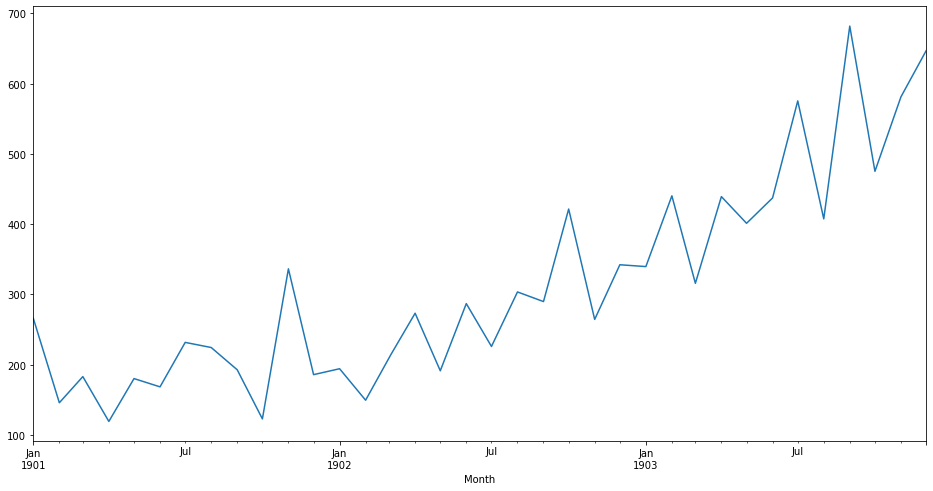

In [54]:
interpolated.plot(figsize=(16,8))

<AxesSubplot:xlabel='Month'>

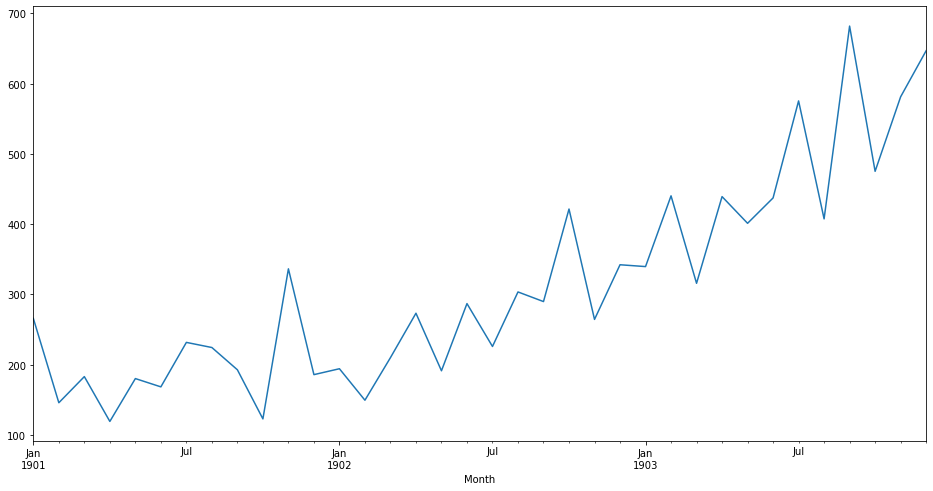

In [55]:
s2.plot(figsize=(16,8))

#### Spline interpolation

In [60]:
interpolated2= upsampled2.interpolate(method='spline', order=2)
interpolated2.head(32)

Month
1901-01-01    266.000000
1901-01-02    258.630160
1901-01-03    251.560886
1901-01-04    244.720748
1901-01-05    238.109746
1901-01-06    231.727880
1901-01-07    225.575149
1901-01-08    219.651553
1901-01-09    213.957094
1901-01-10    208.491770
1901-01-11    203.255582
1901-01-12    198.248529
1901-01-13    193.470612
1901-01-14    188.921831
1901-01-15    184.602185
1901-01-16    180.511676
1901-01-17    176.650301
1901-01-18    173.018063
1901-01-19    169.614960
1901-01-20    166.440993
1901-01-21    163.496161
1901-01-22    160.780465
1901-01-23    158.293905
1901-01-24    156.036481
1901-01-25    154.008192
1901-01-26    152.209039
1901-01-27    150.639021
1901-01-28    149.298139
1901-01-29    148.186393
1901-01-30    147.303783
1901-01-31    146.650308
1901-02-01    145.900000
Freq: D, Name: Sales, dtype: float64

<AxesSubplot:xlabel='Month'>

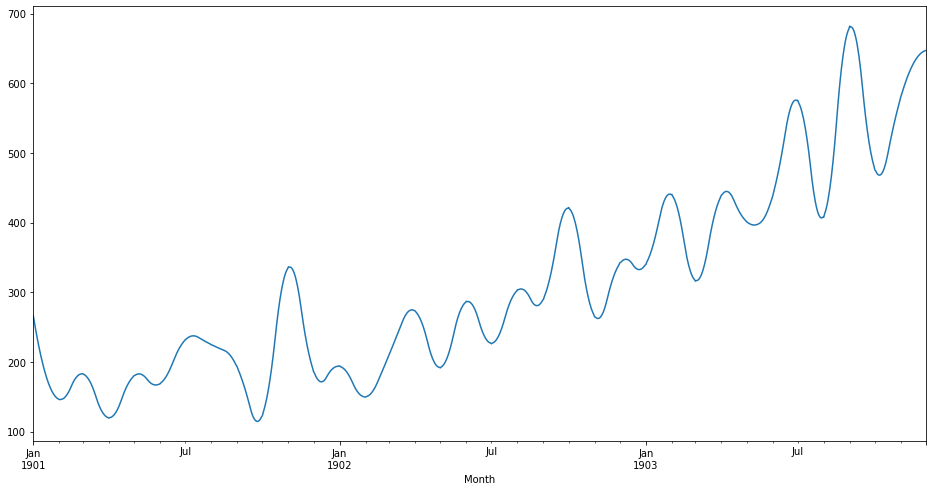

In [62]:
interpolated2.plot(figsize=(16,8))

<AxesSubplot:xlabel='Month'>

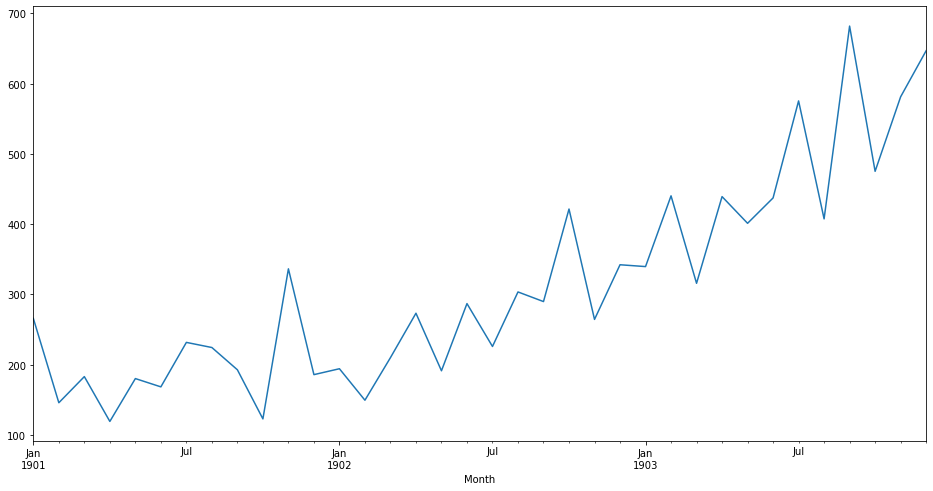

In [63]:
s2.plot(figsize=(16,8))

##  Downsampling Data

In [77]:
s2.head(32)

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Month'>

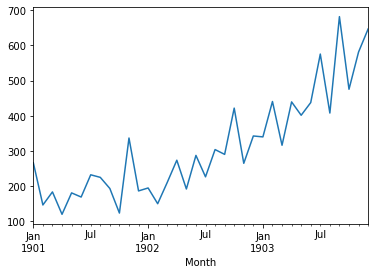

In [78]:
s2.plot()

Month
1901-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
1901-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
1901-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
1901-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
1902-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
1902-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
1902-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
1902-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
1903-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
1903-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
1903-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
1903-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: Q-DEC, Name: Sales, dtype: object

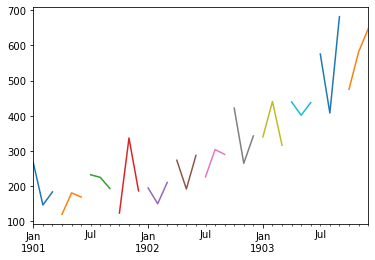

In [76]:
resample=s2.resample('Q')
resample.plot()

In [80]:
quarterly_mean_sales=resample.mean()
quarterly_mean_sales.head()

Month
1901-03-31    198.333333
1901-06-30    156.033333
1901-09-30    216.366667
1901-12-31    215.100000
1902-03-31    184.633333
Freq: Q-DEC, Name: Sales, dtype: float64

<AxesSubplot:xlabel='Month'>

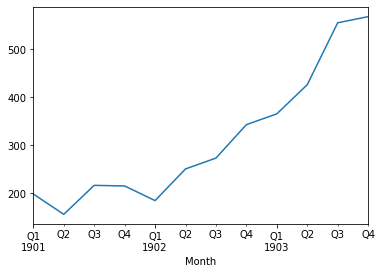

In [81]:
quarterly_mean_sales.plot()

In [82]:
resample= s2.resample('A')
# We downsample the data using "A" for year-end frequency

In [84]:
yearly_mean_sales= resample.sum()
yearly_mean_sales.head()

Month
1901-12-31    2357.5
1902-12-31    3153.5
1903-12-31    5742.6
Freq: A-DEC, Name: Sales, dtype: float64

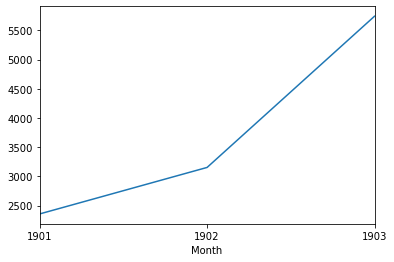

In [86]:
yearly_mean_sales.plot();

In [ ]:
|